In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmp2ubdan8gGP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 5

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmp2ubdan8gGP2/unet_0.model
History saved to /tmp/tmp2ubdan8gGP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 10s 104ms/step - loss: 0.9157 - dice_coeff: 0.4058
Model saved to /tmp/tmp2ubdan8gGP2/cnnd_0.model
History saved to /tmp/tmp2ubdan8gGP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 23ms/step - loss: 0.1876 - accuracy: 0.9867
Found 300 machine labels.
Replacing 100 from 300 !
Removed: 84 Filled: 84
TOOK 2297.6727643013 seconds
***
RUN: 1
Model saved to /tmp/tmp2ubdan8gGP2/unet_1.model
History saved to /tmp/tmp2ubdan8gGP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 9s 98ms/step - loss: 0.6621 - dice_coeff: 0.5254
Testing the discriminator...
19/19 [==============================] - 1s 26ms/step - loss: 8.5971 - accuracy: 0.7650
Found 153 machine labels.
Replacing 51 from 153 !
Removed: 49 Filled: 49
TOOK 2107.371081352234 

In [10]:
R.classifier_scores

[[0.9156632423400879, 0.4058244526386261],
 [0.6621054410934448, 0.525407612323761],
 [0.432913213968277, 0.6711912155151367],
 [0.23769482970237732, 0.818067729473114],
 [0.12111461162567139, 0.9171703457832336]]

In [11]:
R.discriminator_scores

[[0.18762366473674774, 0.9866666793823242],
 [8.597139358520508, 0.7649999856948853],
 [10.293930053710938, 0.7416666746139526],
 [12.015337944030762, 0.70333331823349],
 [10.586000442504883, 0.7483333349227905]]

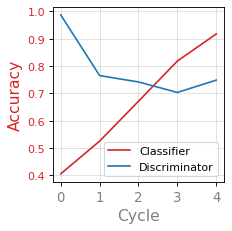

In [12]:
R.plot()